In [20]:
import pandas as pd
vaccinations_data = pd.read_csv('/Users/oleksiypolegenko/Projects/IDE/PY_13_Vizualization_of_Data/data/country_vaccinations.csv')
covid_data = pd.read_csv('/Users/oleksiypolegenko/Projects/IDE/PY_13_Vizualization_of_Data/data/covid_data.csv')

In [21]:
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']]

vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

display(vaccinations_data)

country       date  total_vaccinations  people_vaccinated  \
0      Afghanistan 2021-02-22                 0.0                0.0   
1      Afghanistan 2021-02-23                 NaN                NaN   
2      Afghanistan 2021-02-24                 NaN                NaN   
3      Afghanistan 2021-02-25                 NaN                NaN   
4      Afghanistan 2021-02-26                 NaN                NaN   
...            ...        ...                 ...                ...   
42790     Zimbabwe 2021-09-01           4270430.0          2615233.0   
42791     Zimbabwe 2021-09-02           4323735.0          2649505.0   
42792     Zimbabwe 2021-09-03           4372216.0          2681657.0   
42793     Zimbabwe 2021-09-04           4400246.0          2698332.0   
42794     Zimbabwe 2021-09-05           4431599.0          2713248.0   

       people_vaccinated_per_hundred  people_fully_vaccinated  \
0                               0.00                      NaN   
1                                NaN                      NaN   
2                                NaN                      NaN   
3                                NaN                      NaN   
4                                NaN                      NaN   
...                              ...                      ...   
42790                          17.33                1655197.0   
42791                          17.56                1674230.0   
42792                          17.77                1690559.0   
42793                          17.88                1701914.0   
42794                          17.98                1718351.0   

       people_fully_vaccinated_per_hundred  daily_vaccinations  \
0                                      NaN                 NaN   
1                                      NaN              1367.0   
2                                      NaN              1367.0   
3                                      NaN              1367.0   
4                                      NaN              1367.0   
...                                    ...                 ...   
42790                                10.97             36416.0   
42791                                11.09             39711.0   
42792                                11.20             42317.0   
42793                                11.28             41413.0   
42794                                11.39             41964.0   

                                                vaccines  
0      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
1      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
2      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
3      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
4      Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
...                                                  ...  
42790  Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...  
42791  Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...  
42792  Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...  
42793  Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...  
42794  Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...  

[42795 rows x 9 columns]

In [22]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

covid_data['date'] = pd.to_datetime(covid_data['date'])

covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

display(covid_data)

date                         country  confirmed  deaths  \
11337 2020-02-24                     Afghanistan        1.0     0.0   
11570 2020-02-25                     Afghanistan        1.0     0.0   
11807 2020-02-26                     Afghanistan        1.0     0.0   
12051 2020-02-27                     Afghanistan        1.0     0.0   
12299 2020-02-28                     Afghanistan        1.0     0.0   
...          ...                             ...        ...     ...   
15933 2020-03-12  occupied Palestinian territory        0.0     0.0   
16595 2020-03-14  occupied Palestinian territory        0.0     0.0   
16938 2020-03-15  occupied Palestinian territory        0.0     0.0   
17290 2020-03-16  occupied Palestinian territory        0.0     0.0   
17645 2020-03-17  occupied Palestinian territory        0.0     0.0   

       recovered  active  daily_confirmed  daily_deaths  daily_recovered  
11337        0.0     1.0              NaN           NaN              NaN  
11570        0.0     1.0              0.0           0.0              0.0  
11807        0.0     1.0              0.0           0.0              0.0  
12051        0.0     1.0              0.0           0.0              0.0  
12299        0.0     1.0              0.0           0.0              0.0  
...          ...     ...              ...           ...              ...  
15933        0.0     0.0              0.0           0.0              0.0  
16595        0.0     0.0              0.0           0.0              0.0  
16938        0.0     0.0              0.0           0.0              0.0  
17290        0.0     0.0              0.0           0.0              0.0  
17645        0.0     0.0              0.0           0.0              0.0  

[86785 rows x 9 columns]

In [23]:
display(covid_data['date'].min())
display(covid_data['date'].max())

Timestamp('2020-01-22 00:00:00')

Timestamp('2021-05-29 00:00:00')

In [24]:
display(vaccinations_data['date'].min())
display(vaccinations_data['date'].max())

Timestamp('2020-12-02 00:00:00')

Timestamp('2021-09-06 00:00:00')

In [25]:
covid_df = covid_data.merge(vaccinations_data, how='left', on=['date', 'country'])
display(covid_df.head())

date      country  confirmed  deaths  recovered  active  \
0 2020-02-24  Afghanistan        1.0     0.0        0.0     1.0   
1 2020-02-25  Afghanistan        1.0     0.0        0.0     1.0   
2 2020-02-26  Afghanistan        1.0     0.0        0.0     1.0   
3 2020-02-27  Afghanistan        1.0     0.0        0.0     1.0   
4 2020-02-28  Afghanistan        1.0     0.0        0.0     1.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              0.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   
3              0.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  
0                                  NaN                 NaN      NaN  
1                                  NaN                 NaN      NaN  
2                                  NaN                 NaN      NaN  
3                                  NaN                 NaN      NaN  
4                                  NaN                 NaN      NaN

In [26]:
covid_df['death_rate'] = (covid_df['deaths'] / covid_df['confirmed']) * 100
covid_df['recover_rate'] = (covid_df['recovered'] / covid_df['confirmed']) * 100

In [27]:
round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2)

7.19

In [28]:
round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)

67.06

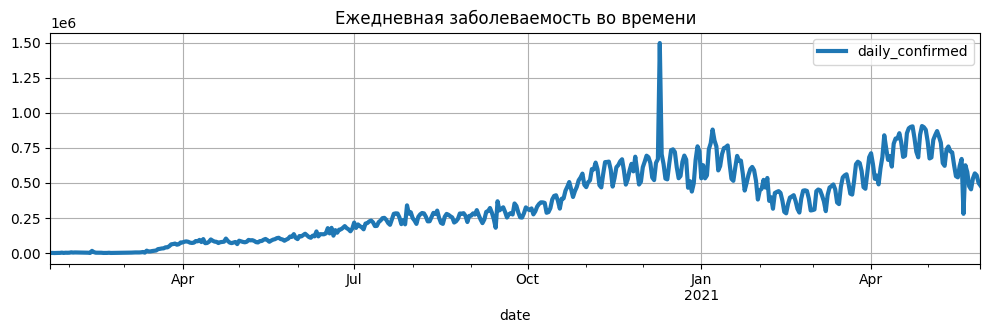

In [29]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 3),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    legend=True,
    lw=3
);

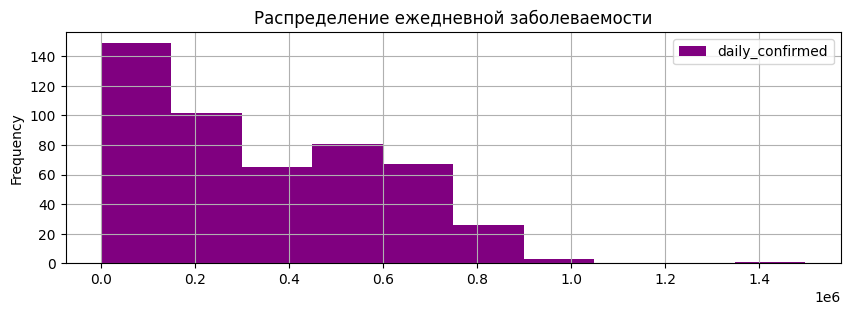

In [30]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 3),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'purple',
    bins=10,
    legend=True
);

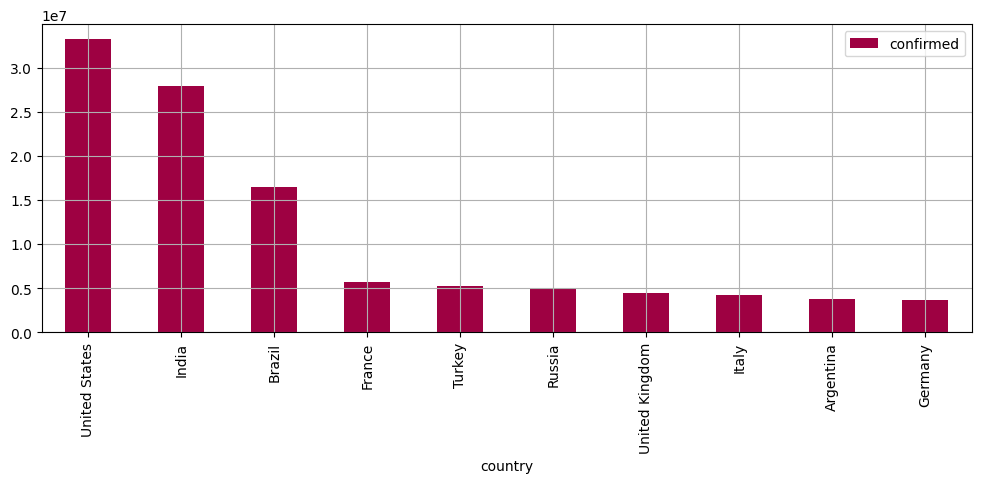

In [31]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='Spectral',
    legend=True
);

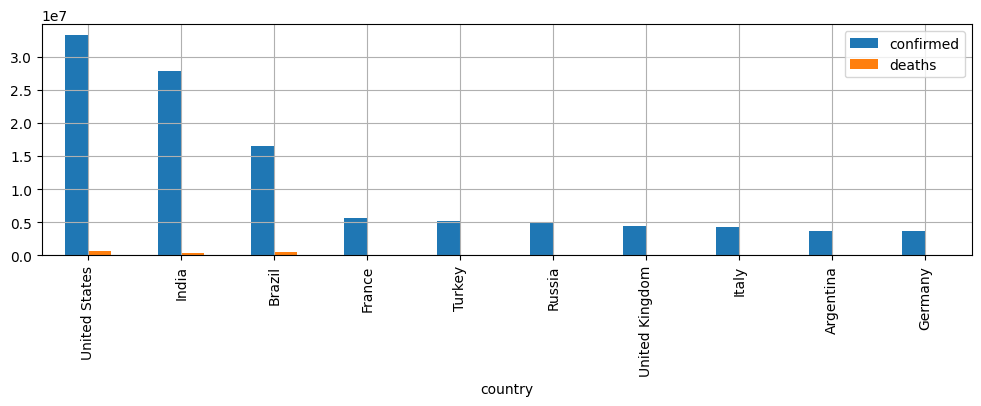

In [32]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(     kind='bar',     grid=True,     figsize=(12, 3));

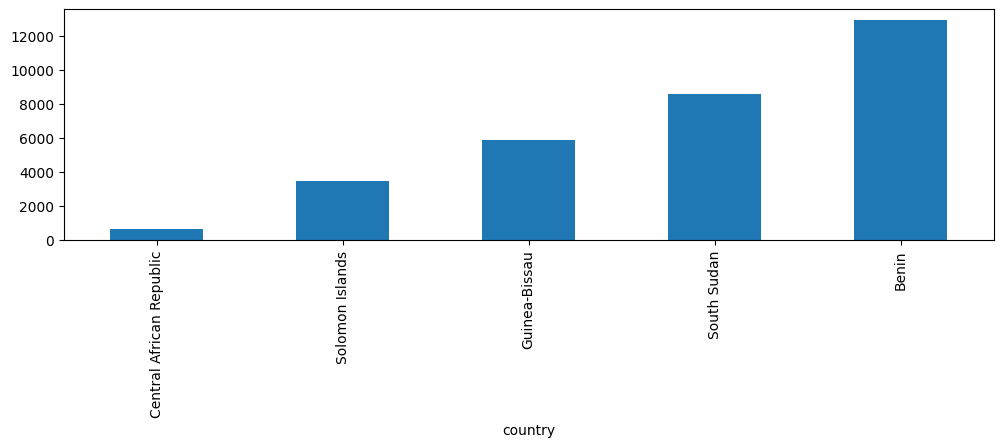

In [33]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar', figsize=(12,3));

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

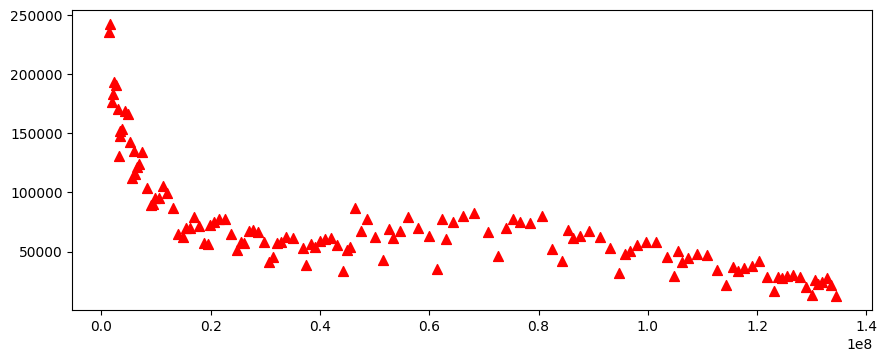

In [35]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=50,
    marker='^',
    c = 'red',
);

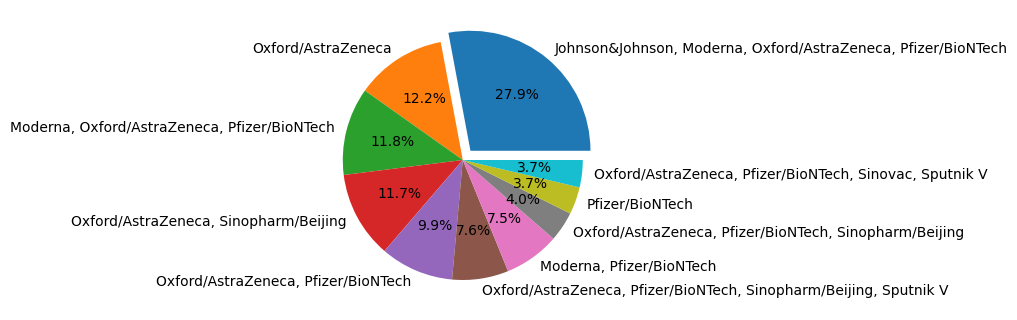

In [36]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

In [37]:
#избавляемся от пропусков в столбце с вакцинами
combination_not_nan = covid_df.dropna(subset=['vaccines'])
#группируем по странам и выбираем последнюю комбинацию вакцин в стране
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last() 
#заменяем пробелы в строках и делим комбинации на отдельные вакцины по запятой
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(',')) 
#создаём пустой словарь, ключами которого будут вакцины, а значениями — количество стран
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество
#преобразуем словарь в Series
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
#выделяем ТОП-7 вакцин и добавляем категорию 'other'
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]

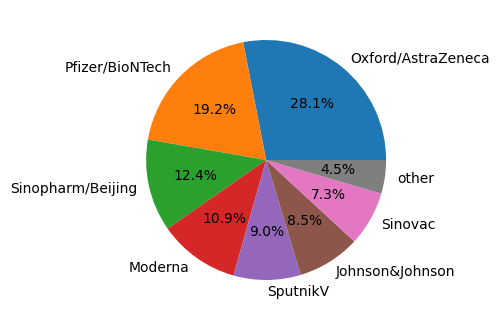

In [38]:
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
);

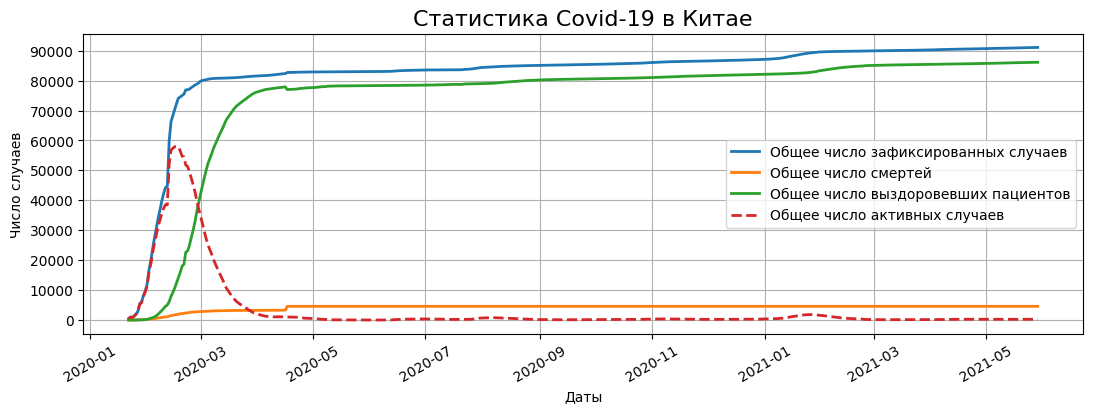

In [39]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=2)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=2)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=2)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=2, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

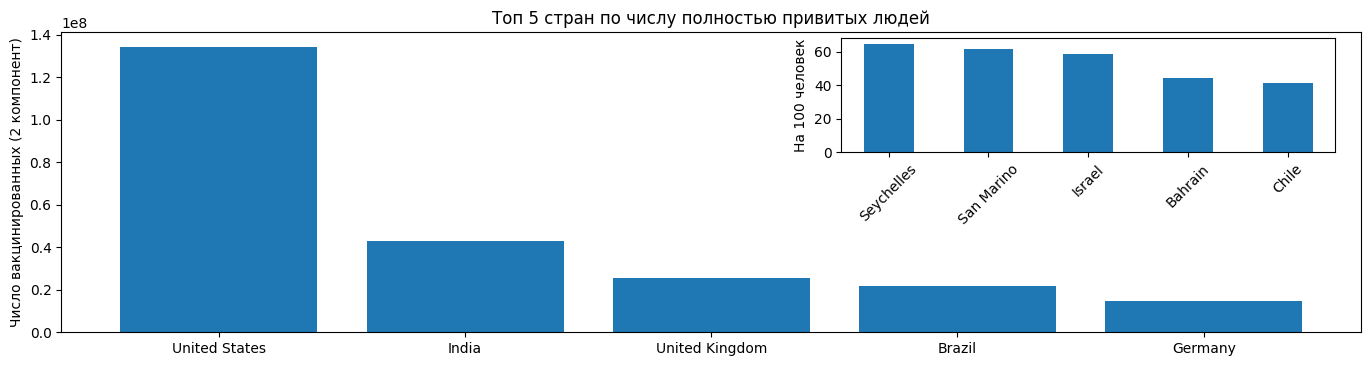

In [40]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 3))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

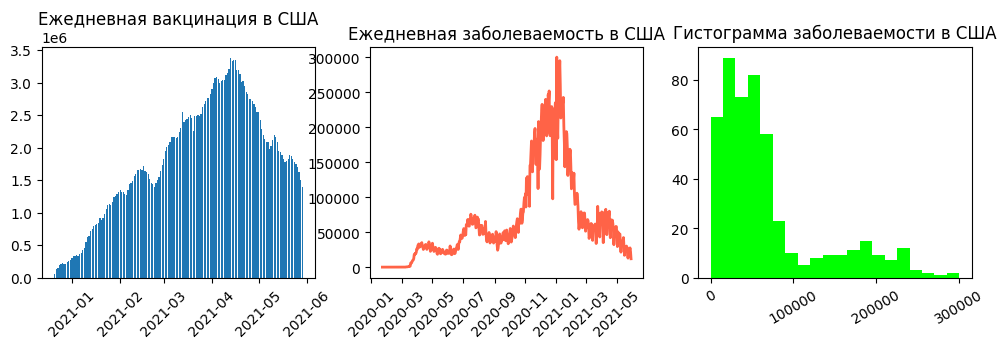

In [41]:
usa_data = covid_df[covid_df["country"] == "United States"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

# столбчатая диаграмма
axes[0].bar(
    x=usa_data["date"],
    height=usa_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в США")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    usa_data["date"],
    usa_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в США")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=usa_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в США")
axes[2].xaxis.set_tick_params(rotation=30)

In [42]:
import seaborn as sns

In [43]:
countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
croped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)
croped_covid_df = croped_covid_df.merge(populations, on=['country'])
croped_covid_df['daily_confirmed_per_hundred'] = croped_covid_df['daily_confirmed'] / croped_covid_df['population'] * 100
croped_covid_df.head()

date    country  confirmed  deaths  recovered  active  \
0 2020-01-23  Australia        0.0     0.0        0.0     0.0   
1 2020-01-25  Australia        4.0     0.0        0.0     4.0   
2 2020-01-26  Australia        4.0     0.0        0.0     4.0   
3 2020-01-27  Australia        5.0     0.0        0.0     5.0   
4 2020-01-28  Australia        5.0     0.0        0.0     5.0   

   daily_confirmed  daily_deaths  daily_recovered  total_vaccinations  \
0              NaN           NaN              NaN                 NaN   
1              4.0           0.0              0.0                 NaN   
2              0.0           0.0              0.0                 NaN   
3              1.0           0.0              0.0                 NaN   
4              0.0           0.0              0.0                 NaN   

   people_vaccinated  people_vaccinated_per_hundred  people_fully_vaccinated  \
0                NaN                            NaN                      NaN   
1                NaN                            NaN                      NaN   
2                NaN                            NaN                      NaN   
3                NaN                            NaN                      NaN   
4                NaN                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations vaccines  \
0                                  NaN                 NaN      NaN   
1                                  NaN                 NaN      NaN   
2                                  NaN                 NaN      NaN   
3                                  NaN                 NaN      NaN   
4                                  NaN                 NaN      NaN   

   death_rate  recover_rate  population  daily_confirmed_per_hundred  
0         NaN           NaN    25726900                          NaN  
1         0.0           0.0    25726900                     0.000016  
2         0.0           0.0    25726900                     0.000000  
3         0.0           0.0    25726900                     0.000004  
4         0.0           0.0    25726900                     0.000000

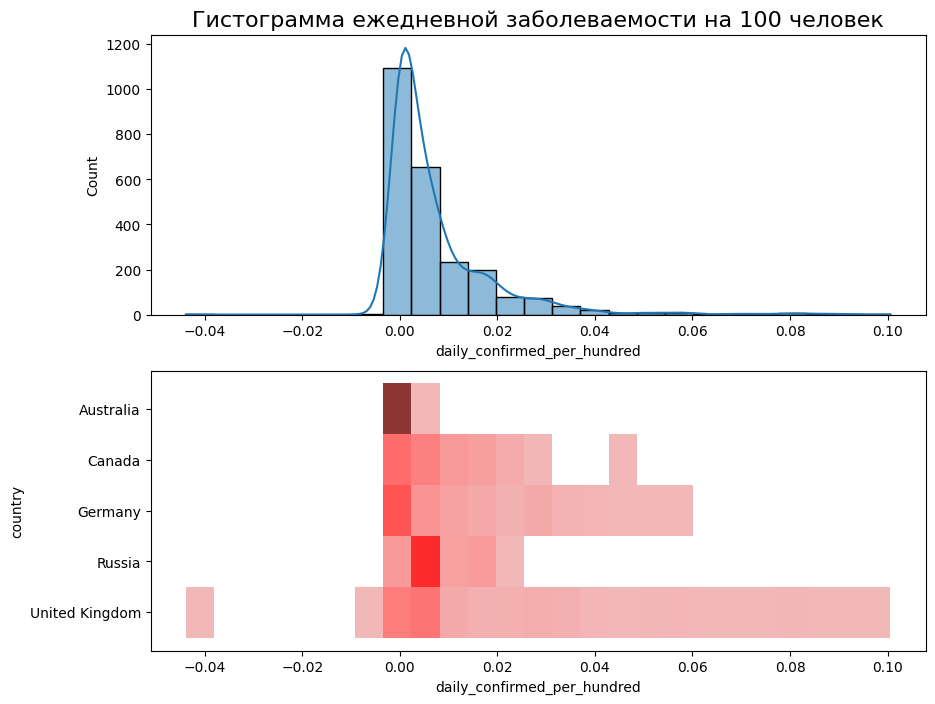

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма ежедневной заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data=croped_covid_df,
    x='daily_confirmed_per_hundred',
    y='country',
    bins=25,
    color='red',
    ax=axes[1]
);

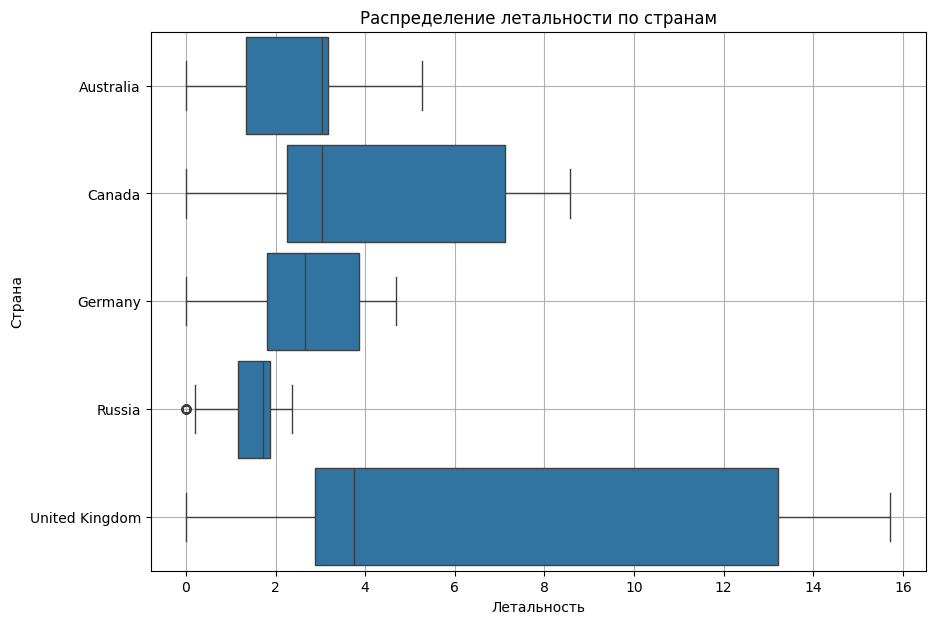

In [45]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='death_rate',
    orient='h',
    width=0.9,
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

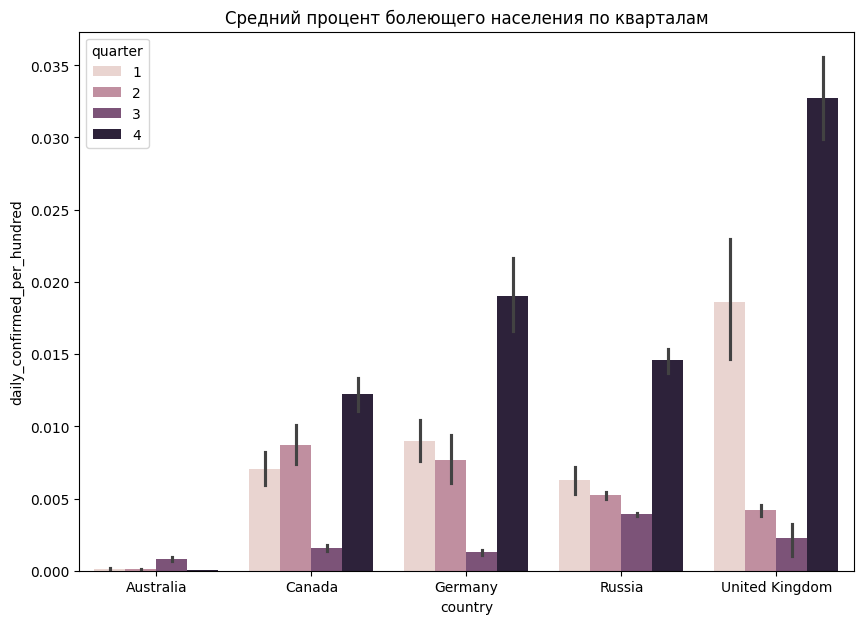

In [46]:
fig = plt.figure(figsize=(10, 7))
croped_covid_df['quarter'] = croped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data=croped_covid_df,
    x='country',
    y='daily_confirmed_per_hundred',
    hue='quarter',
)
barplot.set_title('Средний процент болеющего населения по кварталам');

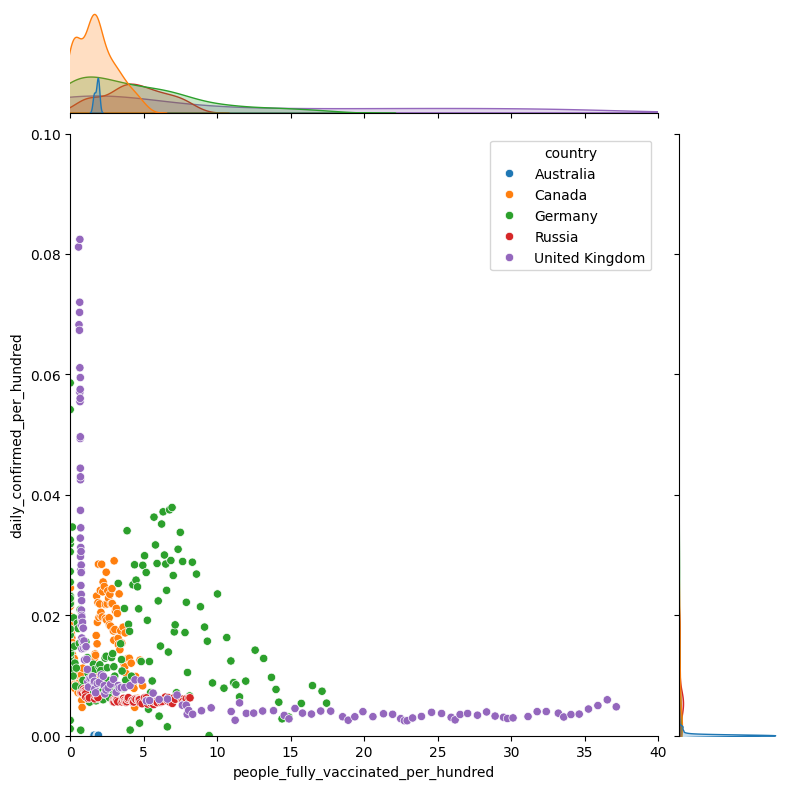

In [47]:
jointplot = sns.jointplot(
    data=croped_covid_df, 
    x='people_fully_vaccinated_per_hundred', 
    y='daily_confirmed_per_hundred',
    hue='country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height=8,
)

In [48]:
pivot = croped_covid_df.pivot_table(
    values='people_vaccinated_per_hundred',
    columns='date',
    index='country',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date            2020-12-13  2020-12-14  2020-12-15  2020-12-16  2020-12-17  \
country                                                                      
Australia              NaN         NaN         NaN         NaN         NaN   
Canada                 NaN         0.0        0.00        0.01        0.02   
Germany                NaN         NaN         NaN         NaN         NaN   
Russia                 NaN         NaN        0.02         NaN         NaN   
United Kingdom        0.13         NaN         NaN         NaN         NaN   

date            2020-12-18  2020-12-19  2020-12-20  2020-12-21  2020-12-22  \
country                                                                      
Australia              NaN         NaN         NaN         NaN         NaN   
Canada                0.03        0.03        0.03        0.05        0.07   
Germany                NaN         NaN         NaN         NaN         NaN   
Russia                 NaN         NaN         NaN         NaN        0.04   
United Kingdom         NaN         NaN        0.99         NaN         NaN   

date            ...  2021-05-20  2021-05-21  2021-05-22  2021-05-23  \
country         ...                                                   
Australia       ...         NaN         NaN         NaN         NaN   
Canada          ...       48.10       49.25       50.14       50.89   
Germany         ...       39.18       39.68       39.95       40.11   
Russia          ...       10.20       10.30       10.50       10.53   
United Kingdom  ...       55.01       55.33       55.63       55.82   

date            2021-05-24  2021-05-25  2021-05-26  2021-05-27  2021-05-28  \
country                                                                      
Australia            12.40       12.69       12.88       13.28       13.73   
Canada               51.77       52.39       53.05       53.95       54.99   
Germany              40.29       40.64       41.29       41.87       42.40   
Russia               10.70       10.81       11.07       11.12       11.19   
United Kingdom       55.99       56.27       56.61       56.99       57.29   

date            2021-05-29  
country                     
Australia            14.18  
Canada               55.71  
Germany              42.61  
Russia               11.29  
United Kingdom       57.56  

[5 rows x 168 columns]

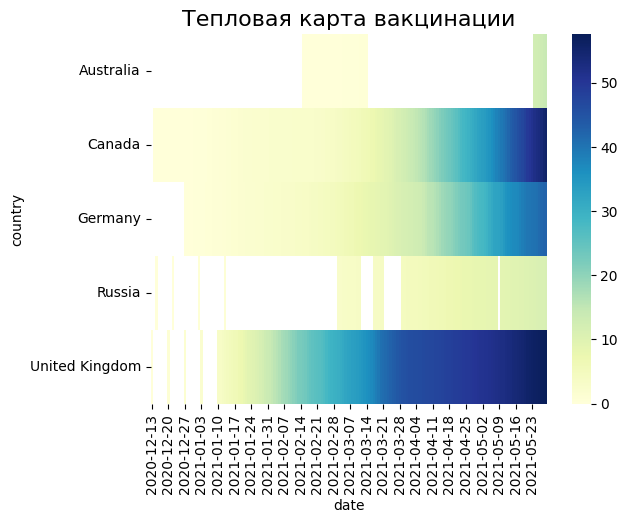

In [49]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

In [50]:
croped_covid_df['confirmed_per_hundred'] = (croped_covid_df['confirmed'] / croped_covid_df['population']) * 100

In [51]:
pivot_2 = croped_covid_df.pivot_table(
    values='confirmed_per_hundred',
    index='country',
    columns='date'
)
pivot_2.columns = pivot_2.columns.astype('string')
display(pivot_2)

date            2020-01-23  2020-01-25  2020-01-26  2020-01-27  2020-01-28  \
country                                                                      
Australia              0.0    0.000016    0.000016    0.000019    0.000019   
Canada                 NaN         NaN    0.000003    0.000003    0.000005   
Germany                NaN         NaN         NaN         NaN    0.000005   
Russia                 NaN         NaN         NaN         NaN         NaN   
United Kingdom         NaN         NaN         NaN         NaN         NaN   

date            2020-01-29  2020-01-30  2020-01-31  2020-02-01  2020-02-02  \
country                                                                      
Australia         0.000019    0.000035    0.000035    0.000047    0.000047   
Canada            0.000005    0.000008    0.000008    0.000011    0.000011   
Germany           0.000005    0.000005    0.000006    0.000010    0.000012   
Russia                 NaN         NaN    0.000001    0.000001    0.000001   
United Kingdom         NaN         NaN    0.000003    0.000003    0.000003   

date            ...  2021-05-20  2021-05-21  2021-05-22  2021-05-23  \
country         ...                                                   
Australia       ...    0.116606    0.116621    0.116637    0.116683   
Canada          ...    3.599497    3.611526    3.620169    3.628017   
Germany         ...    4.345962    4.355632    4.363299    4.368845   
Russia          ...    3.368999    3.375035    3.380916    3.386963   
United Kingdom  ...    6.594230    6.598223    6.601946    6.605033   

date            2021-05-24  2021-05-25  2021-05-26  2021-05-27  2021-05-28  \
country                                                                      
Australia         0.116722    0.116788    0.116854    0.116897    0.116932   
Canada            3.632706    3.642529    3.648718    3.661252    3.669520   
Germany           4.371625    4.374704    4.380047    4.388347    4.395716   
Russia            3.392637    3.397954    3.403604    3.409708    3.415960   
United Kingdom    6.608528    6.612093    6.616504    6.621495    6.627439   

date            2021-05-29  
country                     
Australia         0.116983  
Canada            3.675536  
Germany           4.401106  
Russia            3.422232  
United Kingdom    6.632219  

[5 rows x 492 columns]

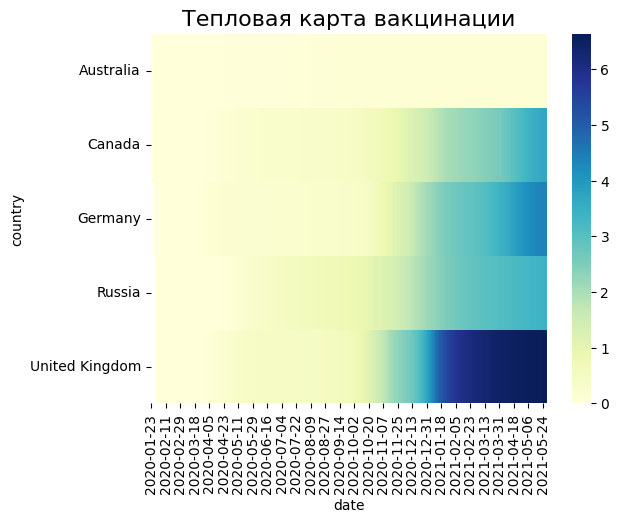

In [52]:
heatmap_2 = sns.heatmap(data=pivot_2, cmap='YlGnBu')
heatmap_2.set_title('Тепловая карта вакцинации', fontsize=16);

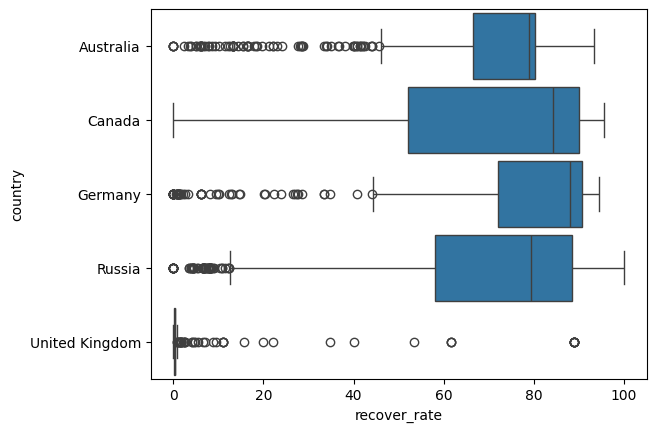

In [53]:
#fig_2 = plt.figure(figsize=(10, 7))
boxplot_2 = sns.boxplot(
    data=croped_covid_df,
    y='country',
    x='recover_rate',
    orient='h',
    width=0.9,
)
boxplot.set_title('Распределение выздоровлений по странам');
boxplot.set_xlabel('Выздоровления');
boxplot.set_ylabel('Страна');
boxplot.grid()

In [54]:
import plotly
import plotly.express as px
print(plotly.__version__)

5.17.0


In [63]:
line_data = covid_df.groupby('date', as_index=False).sum()

fig = px.line(
    data_frame=line_data, #DataFrame
    x='date', #ось абсцисс
    y=['confirmed', 'recovered', 'deaths', 'active'], #ось ординат
    height=500, #высота
    width=1000, #ширина
    title='Confirmed, Recovered, Deaths, Active cases over Time' #заголовок
)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [57]:
#считаем средний процент выздоровлений для каждой страны
bar_data = covid_df.groupby(
    by='country',
    as_index=False
)[['recover_rate']].mean().round(2).nlargest(10, columns=['recover_rate'])

#строим график
fig = px.bar(
    data_frame=bar_data, #датафрейм
    x="country", #ось x
    y="recover_rate", #ось y
    color='country', #расцветка в зависимости от страны
    text = 'recover_rate', #текст на столбцах
    orientation='v', #ориентация графика
    height=500, #высота
    width=1000, #ширина
    title='Top 10 Countries for Recovery Rate' #заголовок
)

#отображаем его
fig.show()

In [58]:
#считаем среднее ежедневно фиксируемое количество выздоровевших по странам
treemap_data = covid_df.groupby(
    by='country',
    as_index=False
)[['daily_recovered']].mean()

#строим график
fig = px.treemap(
    data_frame=treemap_data, #DataFrame
    path=['country'], #категориальный признак, для которого строится график
    values='daily_recovered', #параметр, который сравнивается
    height=500, #высота
    width=1000, #ширина
    title='Daily Recovered Cases by Country' #заголовок
)

#отображаем график
fig.show()

In [59]:
#преобразуем даты в строковый формат
choropleth_data = covid_df.sort_values(by='date')
choropleth_data['date'] = choropleth_data['date'].astype('string')

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #DataFrame
    locations="country", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="confirmed", #от чего зависит цвет
    animation_frame="date", #анимационный бегунок
    range_color=[0, 30e6], #диапазон цвета
    title='Global Spread of COVID-19', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

In [61]:
#фильтруем таблицу по странам
countries=['United States', 'Russia', 'United Kingdom', 'Brazil', 'France']
scatter_data = covid_df[covid_df['country'].isin(countries)]

#строим график
fig = px.scatter_3d(
    data_frame=scatter_data, #DataFrame
    x = 'daily_confirmed', #ось абсцисс
    y = 'daily_deaths', #ось ординат
    z = 'daily_vaccinations', #ось аппликат
    color='country', #расцветка в зависимости от страны
    log_x=True, 
    log_y=True,
    width=1000,
    height=700
)

#отображаем график
fig.show()

In [68]:
fig = px.line(
    data_frame=line_data,
    x = 'date',
    y = 'daily_vaccinations',
    height=500,
    width=1000,
    title='daily vaccinated in the world'
)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [69]:
fig = px.choropleth(
    data_frame=choropleth_data, locations='country', locationmode='country names',
    color='total_vaccinations', animation_frame='date', 
    title = 'global vaccination',
    width=800, height=500, color_continuous_scale='Reds'
    
)
fig.show()